# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

Grid scores on development set:

0.718 (+/-0.020) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.720 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.749 (+/-0.106) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.741 (+/-0.075) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.734 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.742 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
0.745 (+/-0.094) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
0.736 (+/-0.060) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
0.706 (+/-0.071) for {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.712 (+/-0.058) for {'metric': 'manha

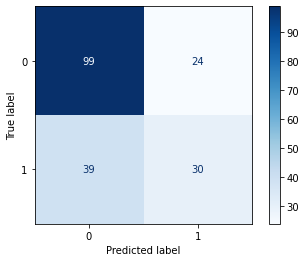

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       123
           1       0.56      0.43      0.49        69

    accuracy                           0.67       192
   macro avg       0.64      0.62      0.62       192
weighted avg       0.66      0.67      0.66       192



TP - True Negative 99
FP - False Positive 24
FN - False Negative 39
TP - True Positive 30
Accuracy Rate: 0.671875
Misclassification Rate: 0.328125


0.61983

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#knn with grid search
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5,10,15,20],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=5,
                       scoring='%s_macro' % score)
    knn.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(knn.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = knn.cv_results_['mean_test_score']
    stds = knn.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, knn.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors = 10,weights='uniform',metric='euclidean')
knnClassifier.fit(X_train, y_train)
print(knnClassifier.get_params(deep=False))
print()
print()
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))
print()
print()

# Predicting the Test set results
y_pred = knnClassifier.predict(X_test)

# Making the Confusion Matrix
disp = plot_confusion_matrix(knnClassifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

cm = confusion_matrix(y_test, y_pred)
#print(cm)

cr = classification_report(y_test, y_pred)
print(cr)
print()
print()

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)
